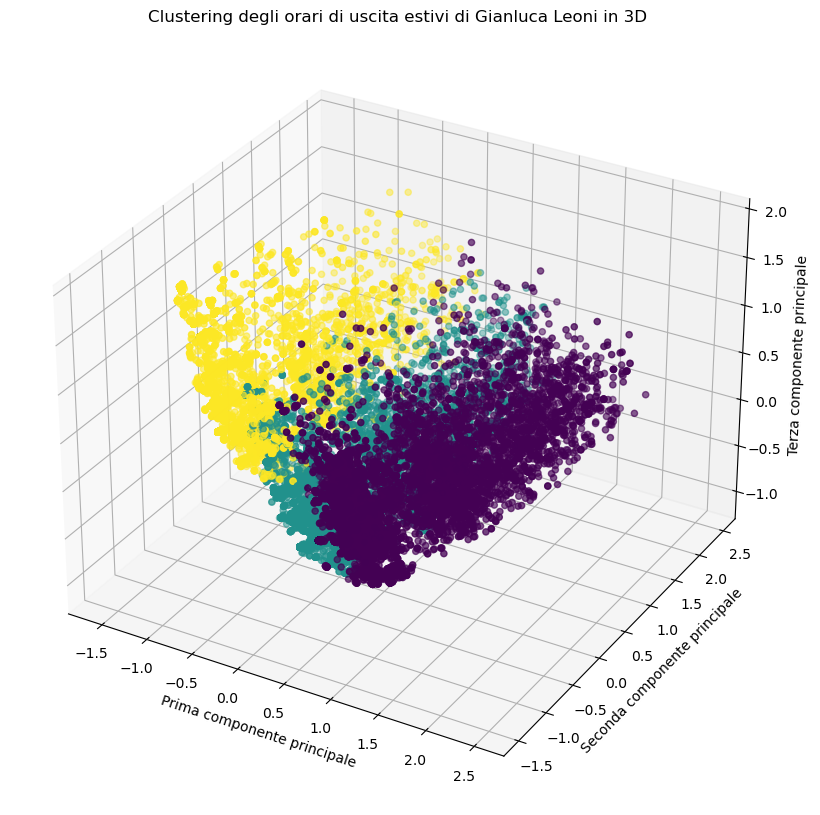

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importa la classe Axes3D

# Codice per caricare le stringhe binarie
file_path = "./data/Cleaned data/BPMNcleaned.csv"

try:
    df = pd.read_csv(file_path, sep=',', engine='python', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, sep=',', engine='python', encoding='latin-1')

if df.shape[1] > 1:
    df = df.drop(columns=df.columns[0])

df[df > 0] = 1
binary_strings = df.astype(str).agg(''.join, axis=1).values
X = np.array([[int(bit) for bit in string] for string in binary_strings])

# Applica K-Means clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# Applica PCA a tre componenti principali
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Informazioni sui componenti principali
explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

#print("Varianza spiegata dai componenti principali:", explained_variance_ratio)
#print("Componenti principali (caratteristiche di ciascun componente):")
#print(components)

# Aumenta la larghezza del diagramma
fig = plt.figure(figsize=(10, 30))

# Visualizza i cluster su tre piani
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clustering delle stringhe binarie in 3D')
ax.set_xlabel('Prima componente principale')
ax.set_ylabel('Seconda componente principale')
ax.set_zlabel('Terza componente principale')
plt.show()


Levenshtein Distance

Hamming Distance

Euclidean Distance